# Understanding problem 

## Objective:
- The goal is to predict the price of a property based on its physical attributes, amenities, and location characteristics. This will help estimate the market value of a property, enabling better decision-making for buyers, sellers, or real estate agencies.

- ID:
A unique identifier for each record in your dataset, typically used to differentiate between properties.

- Square_Feet:
The total area of the property in square feet. This feature indicates the size of the property, which is a key factor in determining its price.

- Num_Bedrooms:
The number of bedrooms in the property. This is another critical feature influencing property value and usability.

- Num_Bathrooms:
The number of bathrooms in the property. Like the number of bedrooms, this impacts the utility and desirability of the property.

- Num_Floors:
The number of floors in the property. This feature gives insight into the vertical layout and can influence the price.

- Year_Built:
The year the property was constructed. This feature can be used to estimate the age of the property, which may impact maintenance costs, energy efficiency, and market appeal.

- Has_Garden:
A binary feature (e.g., 1 for "Yes", 0 for "No") indicating whether the property has a garden. Properties with gardens might be valued higher.

- Has_Pool:
A binary feature indicating if the property has a swimming pool. Pools typically increase property value in certain markets.

- Garage_Size:
The size of the garage, often measured by the number of cars it can accommodate. This feature adds convenience and could increase the property's price.

- Location_Score:
A numeric score representing the desirability of the property's location. Factors like proximity to amenities, neighborhood quality, and safety likely contribute to this score.

- Distance_to_Center:
The distance of the property from the city center, typically in miles or kilometers. Properties closer to the center often have higher prices due to convenience.

- Price:
The price of the property, which is the target variable in most real estate predictive models. It depends on all the other features in the dataset.

# Import library 

In [24]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
RANDOM_STATE = 42
import datetime as dt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# dataset

## load dataset 

In [2]:
dataset=pd.read_csv(r'C:\Users\lap shop\OneDrive\Documents\GDG\TASL  5\real_estate_dataset.csv')

## about dataset

In [4]:
dataset.head(40)

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523
5,6,88.998630,5,3,2,1959,1,1,36,8.994552,17.633250,670386.804433
6,7,64.520903,4,3,1,1938,0,1,32,7.101354,2.429908,523827.125601
7,8,266.544036,5,1,3,1973,1,1,39,9.373784,12.692785,875352.545188
8,9,200.278753,5,1,1,1988,1,1,32,6.032918,11.642876,738269.852342
9,10,227.018144,3,2,1,1917,0,0,29,4.734009,2.368301,490552.681240


In [5]:
dataset.columns

Index(['ID', 'Square_Feet', 'Num_Bedrooms', 'Num_Bathrooms', 'Num_Floors',
       'Year_Built', 'Has_Garden', 'Has_Pool', 'Garage_Size', 'Location_Score',
       'Distance_to_Center', 'Price'],
      dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  500 non-null    int64  
 1   Square_Feet         500 non-null    float64
 2   Num_Bedrooms        500 non-null    int64  
 3   Num_Bathrooms       500 non-null    int64  
 4   Num_Floors          500 non-null    int64  
 5   Year_Built          500 non-null    int64  
 6   Has_Garden          500 non-null    int64  
 7   Has_Pool            500 non-null    int64  
 8   Garage_Size         500 non-null    int64  
 9   Location_Score      500 non-null    float64
 10  Distance_to_Center  500 non-null    float64
 11  Price               500 non-null    float64
dtypes: float64(4), int64(8)
memory usage: 47.0 KB


In [7]:
dataset.shape

(500, 12)

In [8]:
dataset.describe()

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,174.640428,2.958000,1.976000,1.964000,1957.604000,0.536000,0.492000,30.174000,5.164410,10.469641,582209.629529
std,144.481833,74.672102,1.440968,0.820225,0.802491,35.491781,0.499202,0.500437,11.582575,2.853489,5.588197,122273.390345
min,1.000000,51.265396,1.000000,1.000000,1.000000,1900.000000,0.000000,0.000000,10.000000,0.004428,0.062818,276892.470136
25%,125.750000,110.319923,2.000000,1.000000,1.000000,1926.000000,0.000000,0.000000,20.000000,2.760650,6.066754,503080.344140
50%,250.500000,178.290937,3.000000,2.000000,2.000000,1959.000000,1.000000,0.000000,30.000000,5.206518,10.886066,574724.113347
75%,375.250000,239.031220,4.000000,3.000000,3.000000,1988.000000,1.000000,1.000000,41.000000,7.732933,15.072590,665942.301274
max,500.000000,298.241199,5.000000,3.000000,3.000000,2022.000000,1.000000,1.000000,49.000000,9.995439,19.927966,960678.274291


In [9]:
dataset.isnull().sum()

ID                    0
Square_Feet           0
Num_Bedrooms          0
Num_Bathrooms         0
Num_Floors            0
Year_Built            0
Has_Garden            0
Has_Pool              0
Garage_Size           0
Location_Score        0
Distance_to_Center    0
Price                 0
dtype: int64

In [10]:
dataset.duplicated().sum()


0

In [12]:
dataset

,ID,Square_Feet,Num_Bedrooms,Num_Bathrooms,Num_Floors,Year_Built,Has_Garden,Has_Pool,Garage_Size,Location_Score,Distance_to_Center,Price
0,1,143.635030,1,3,3,1967,1,1,48,8.297631,5.935734,602134.816747
1,2,287.678577,1,2,1,1949,0,1,37,6.061466,10.827392,591425.135386
2,3,232.998485,1,3,2,1923,1,0,14,2.911442,6.904599,464478.696880
3,4,199.664621,5,2,2,1918,0,0,17,2.070949,8.284019,583105.655996
4,5,89.004660,4,3,3,1999,1,0,34,1.523278,14.648277,619879.142523
...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,138.338057,2,2,2,1967,1,0,16,4.296086,5.562583,488496.350722
496,497,195.914028,2,3,1,1977,0,1,45,7.406261,2.845105,657736.921717
497,498,69.433659,1,1,2,2004,0,0,18,8.629724,6.263264,405324.950201
498,499,293.598702,5,1,3,1940,1,0,41,5.318891,16.990684,773035.968028


# anyliys feats

## target 

In [14]:
dataset['Price'].describe()

count       500.000000
mean     582209.629529
std      122273.390345
min      276892.470136
25%      503080.344140
50%      574724.113347
75%      665942.301274
max      960678.274291
Name: Price, dtype: float64

Text(0.5, 1.0, 'Price')

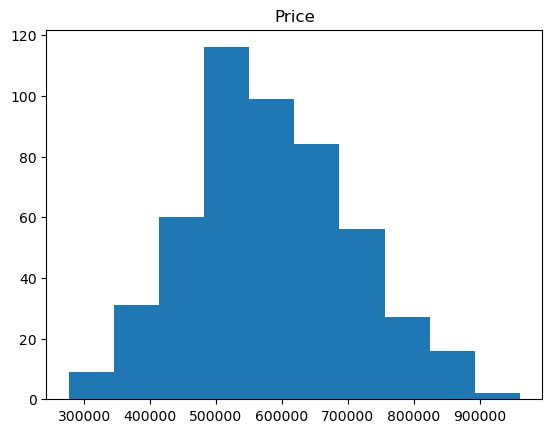

In [17]:
plt.hist(dataset['Price'])
plt.title("Price")

In [19]:
dataset["Price_log"]=np.log(dataset['Price'])


## numircal_coulmns 

- all feats in num 

In [20]:
numerical_cols= dataset.select_dtypes(exclude=object)


C:\Users\lap shop\AppData\Local\Temp\ipykernel_4344\264624390.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[col], ax=ax[0]).set(title="Distplot")
C:\Users\lap shop\AppData\Local\Temp\ipykernel_4344\264624390.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\lap shop\AppData\Local\Temp\ipykernel_4344\264624390.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `hist

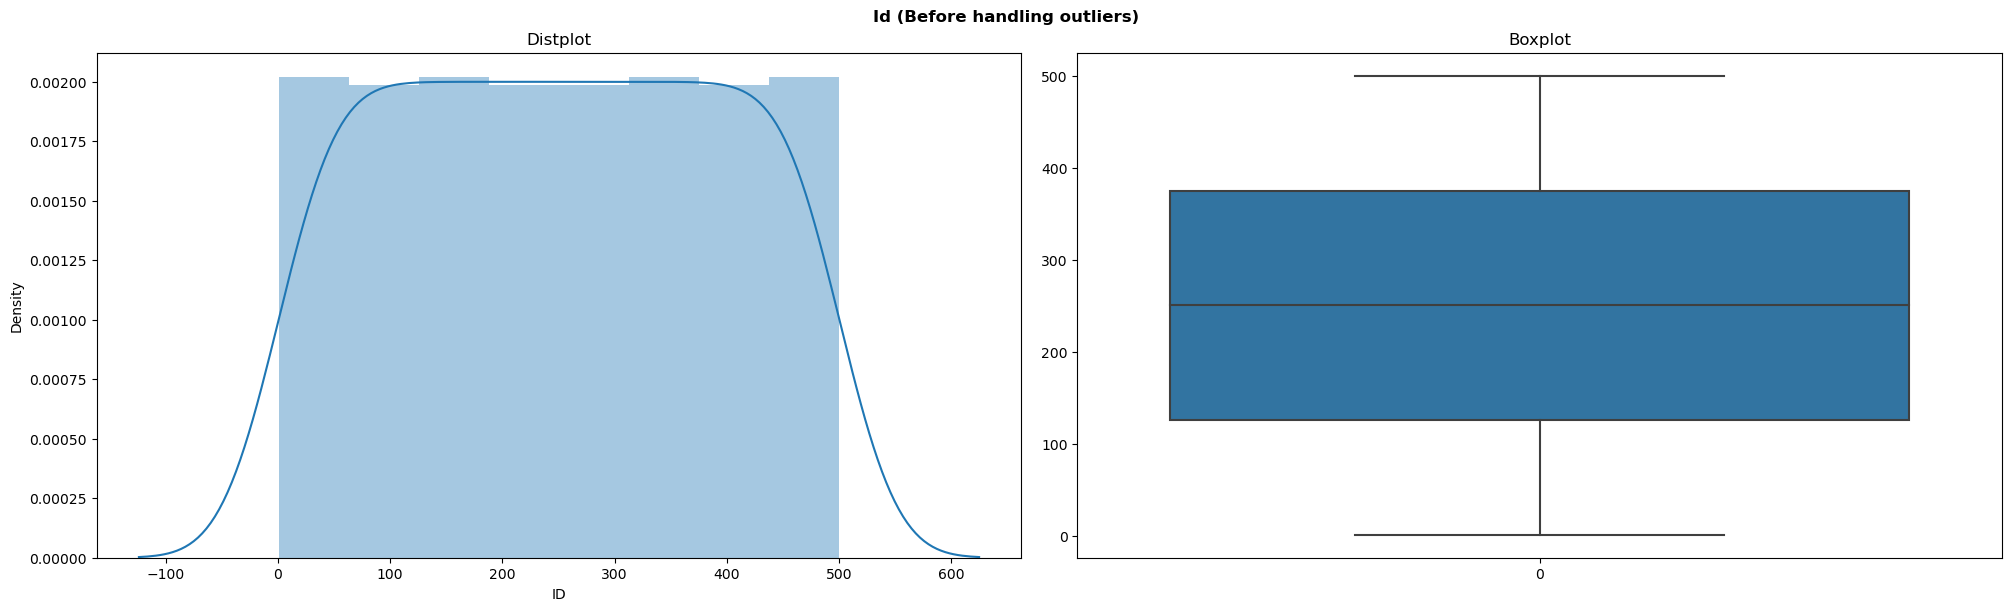

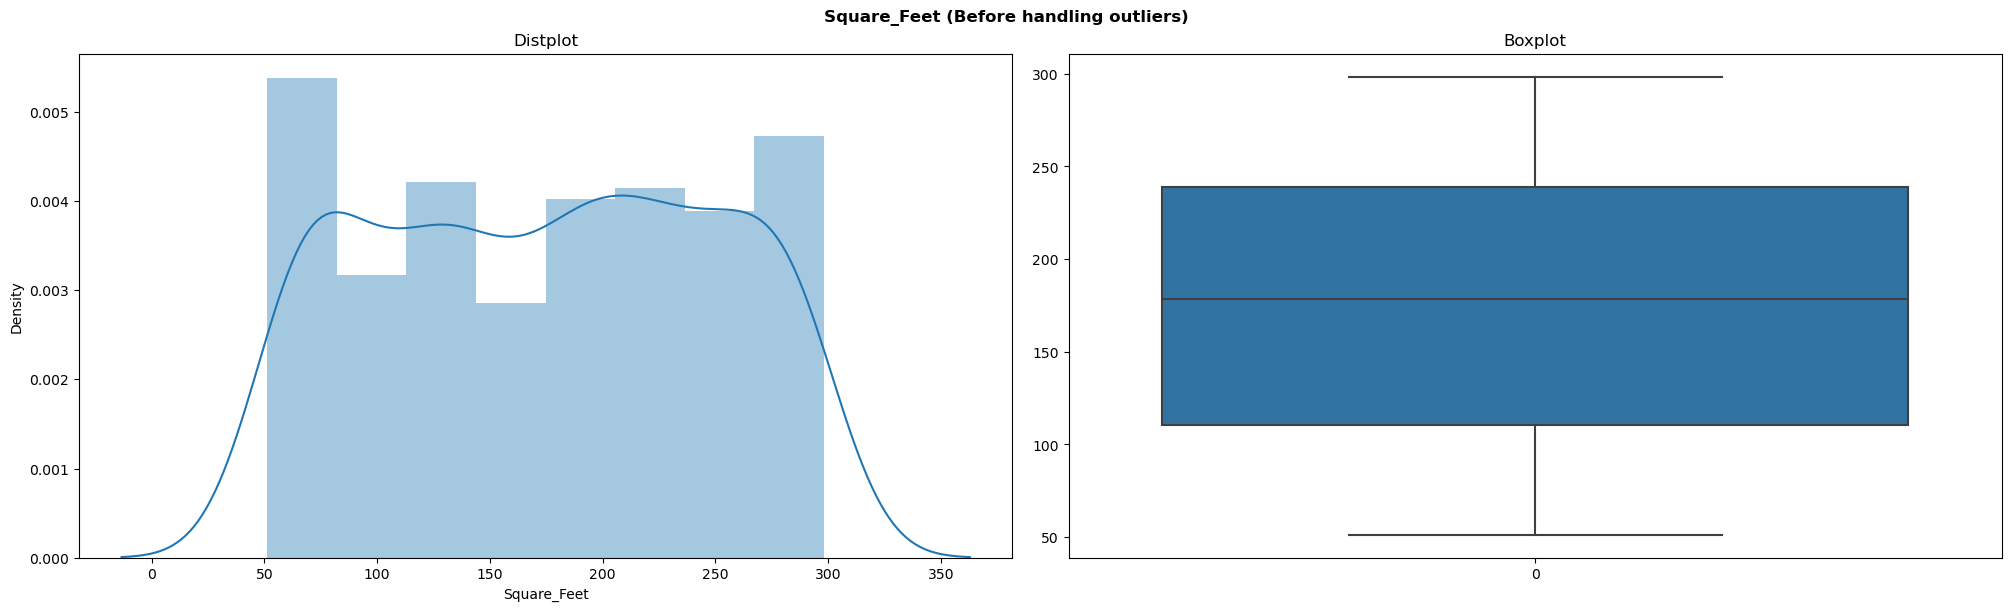

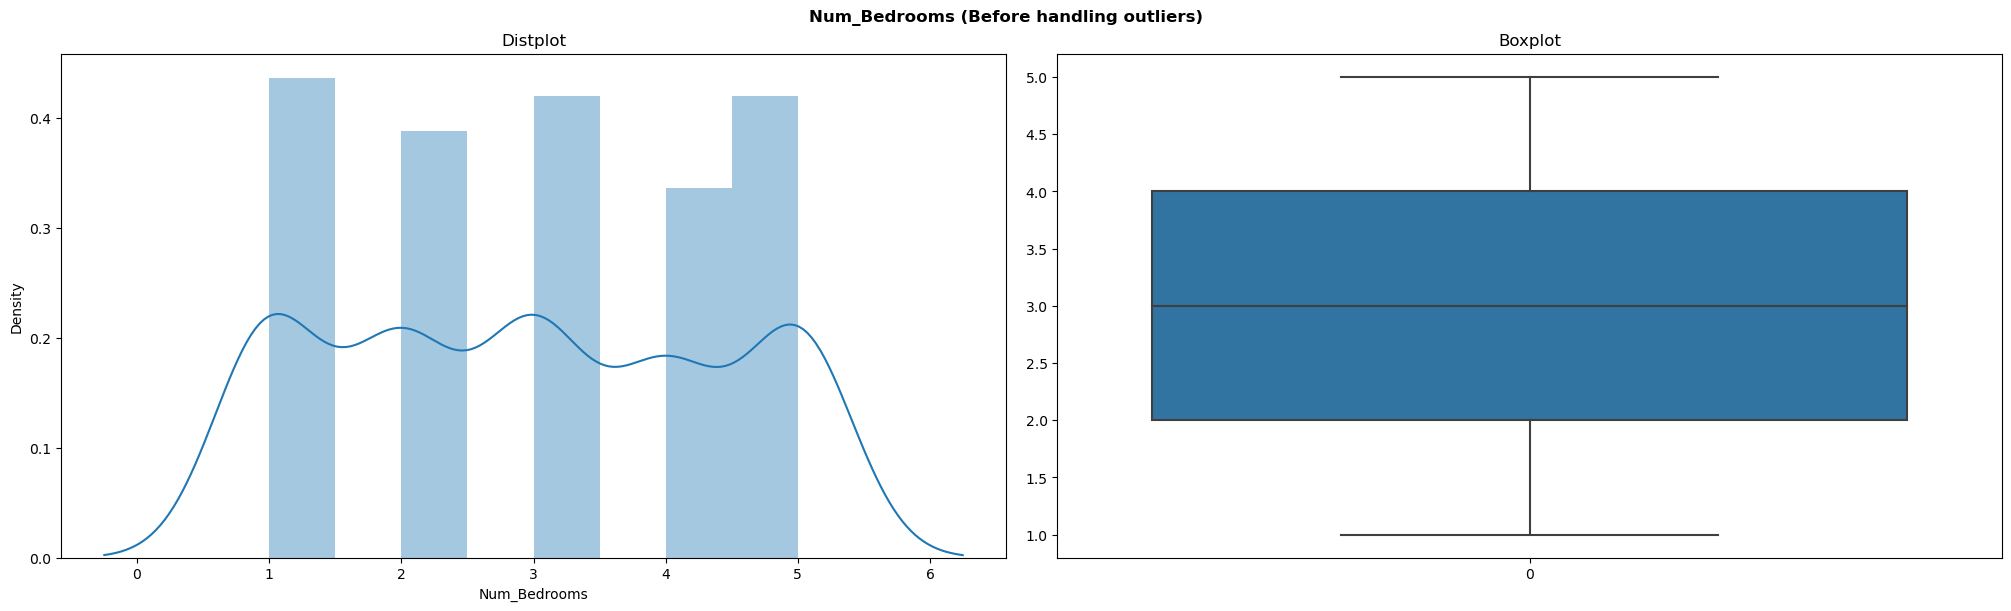

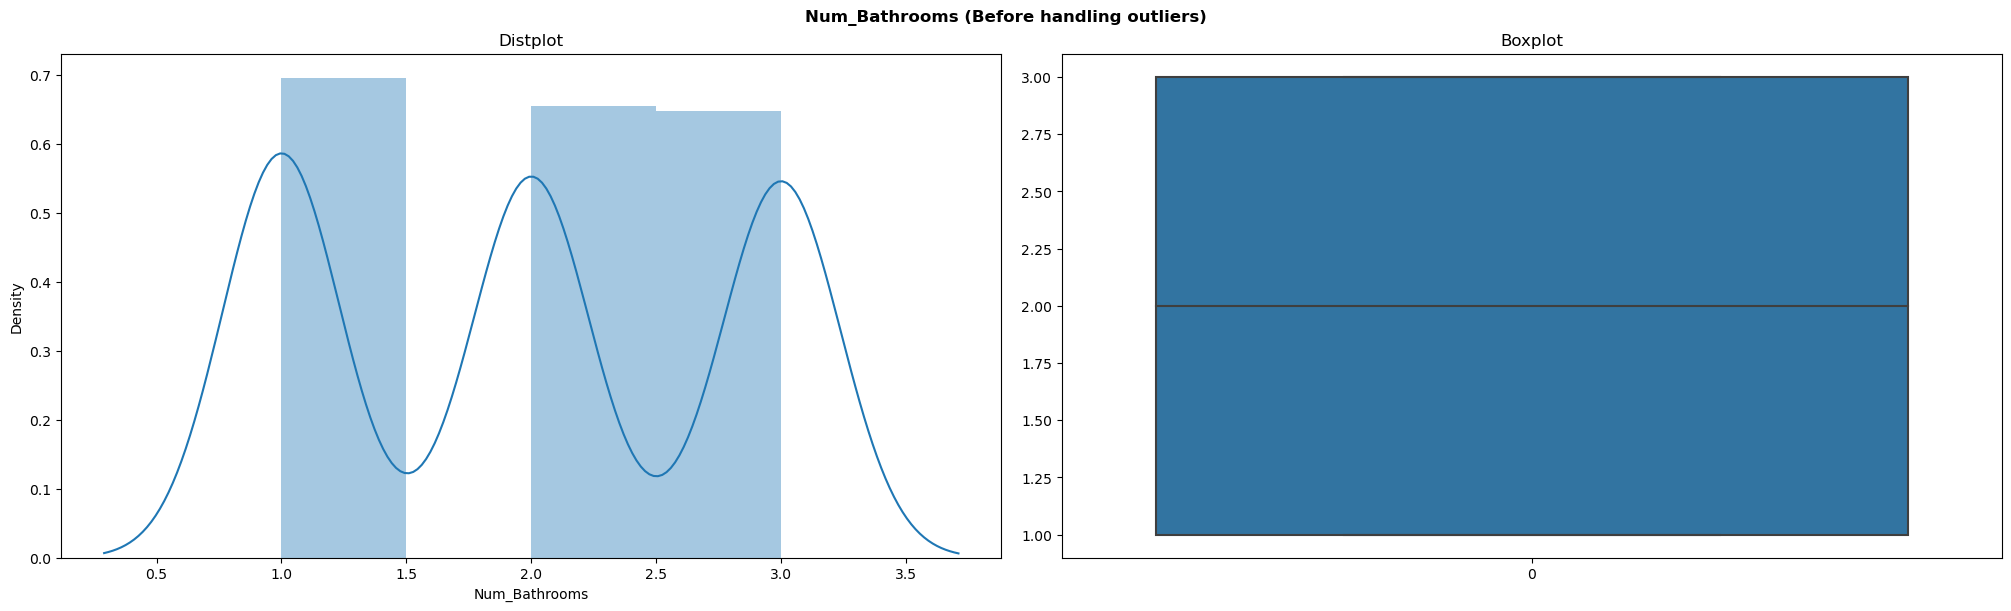

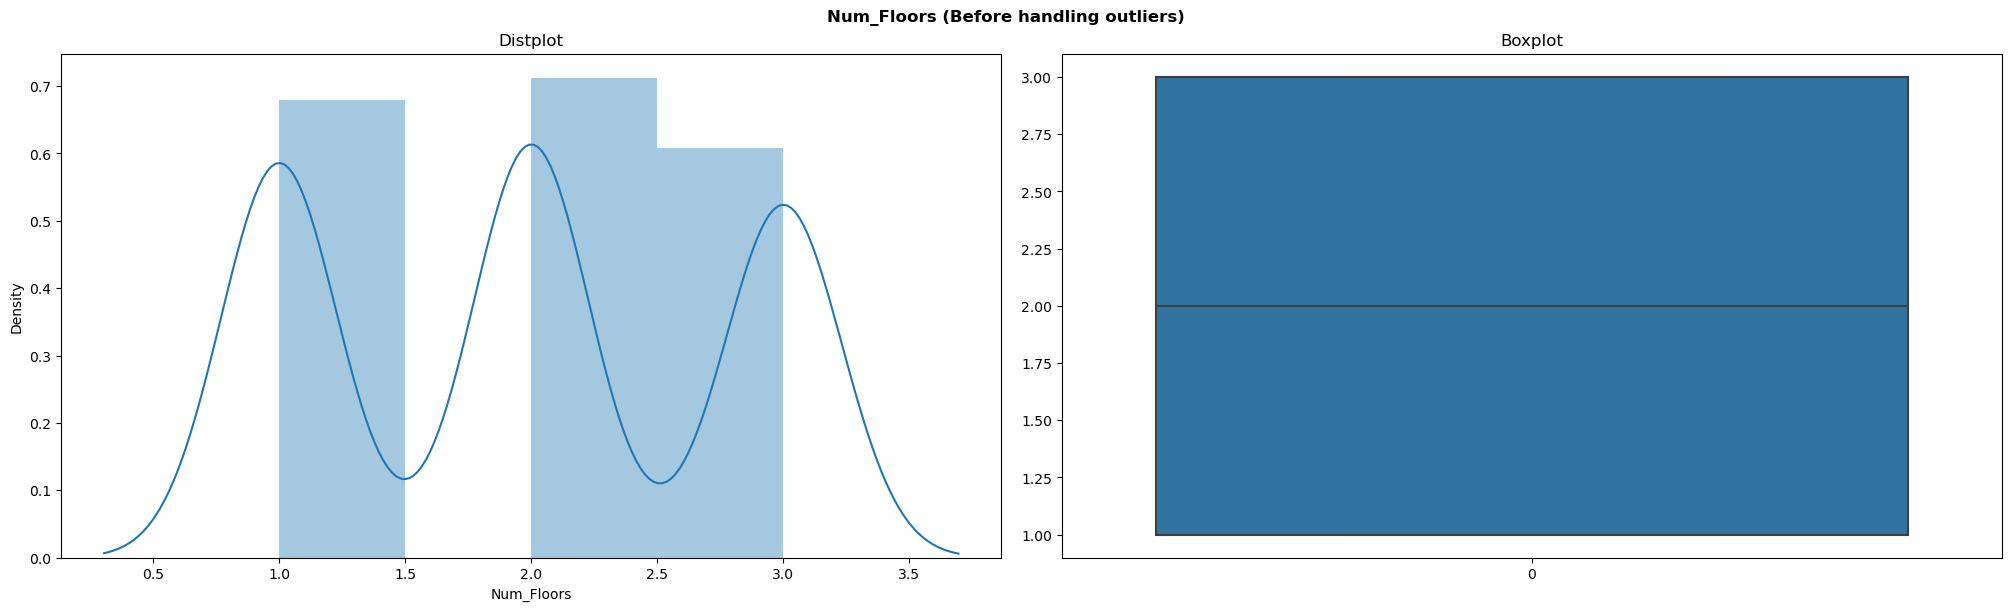

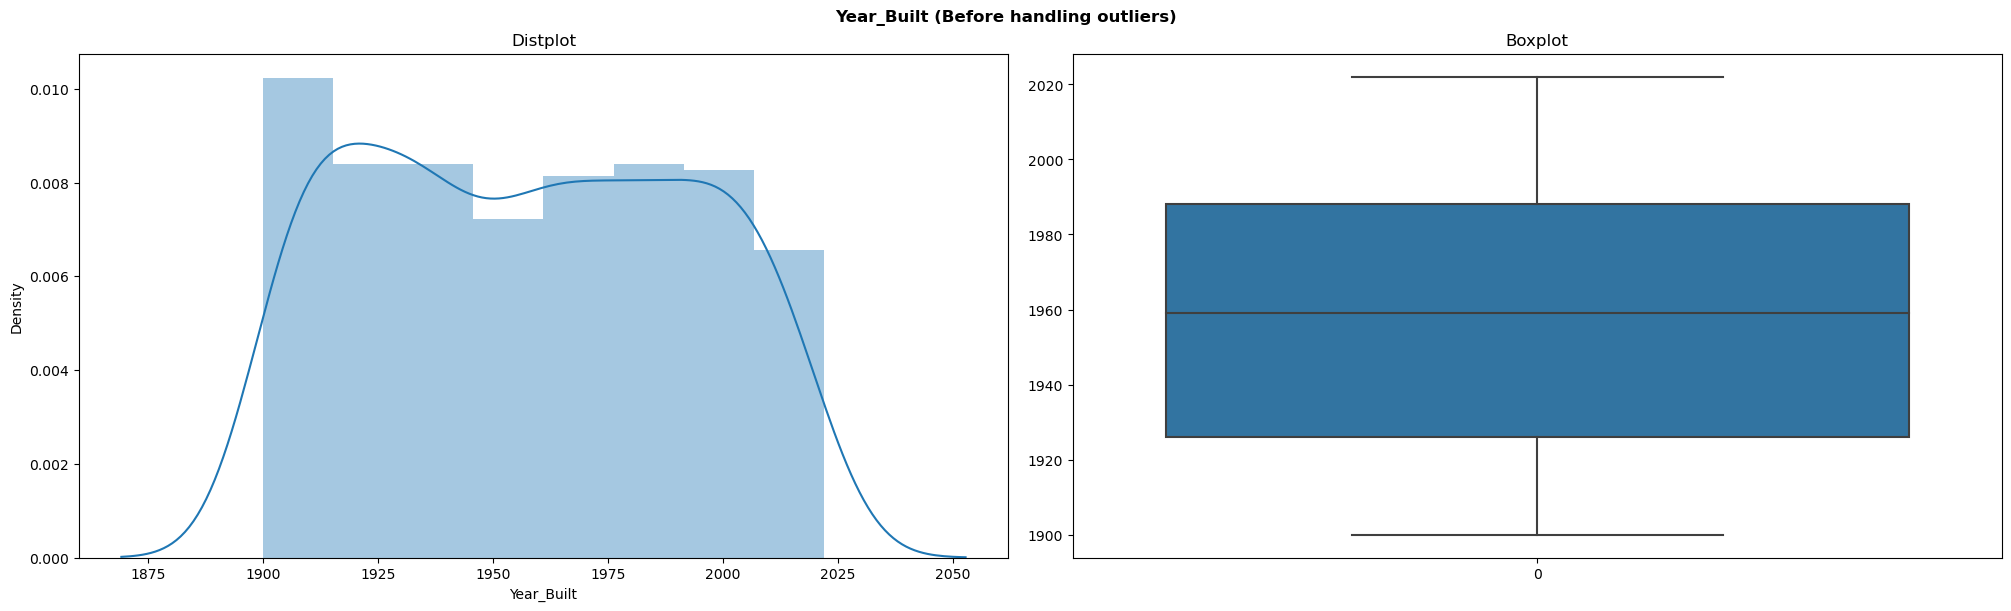

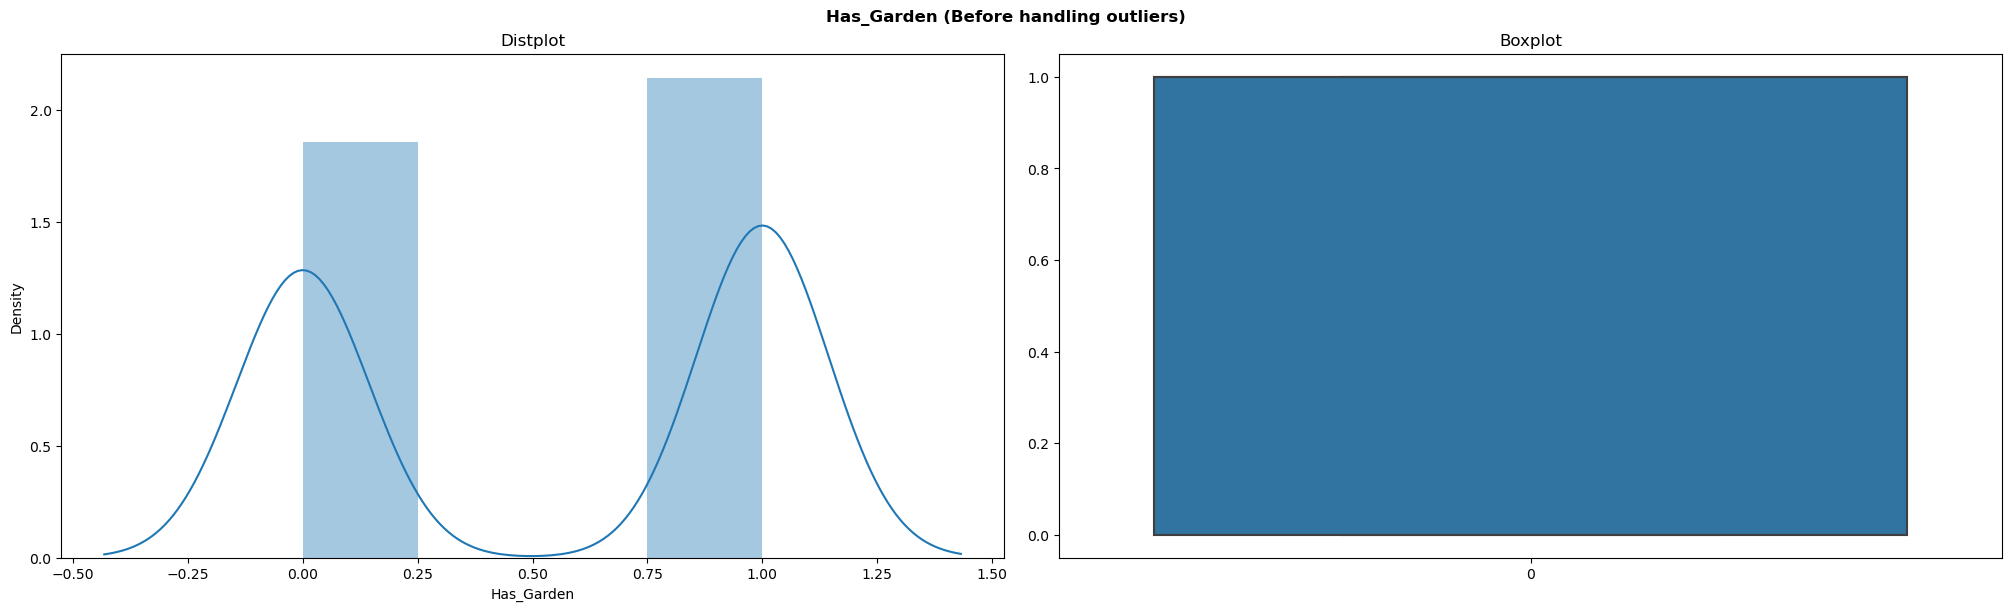

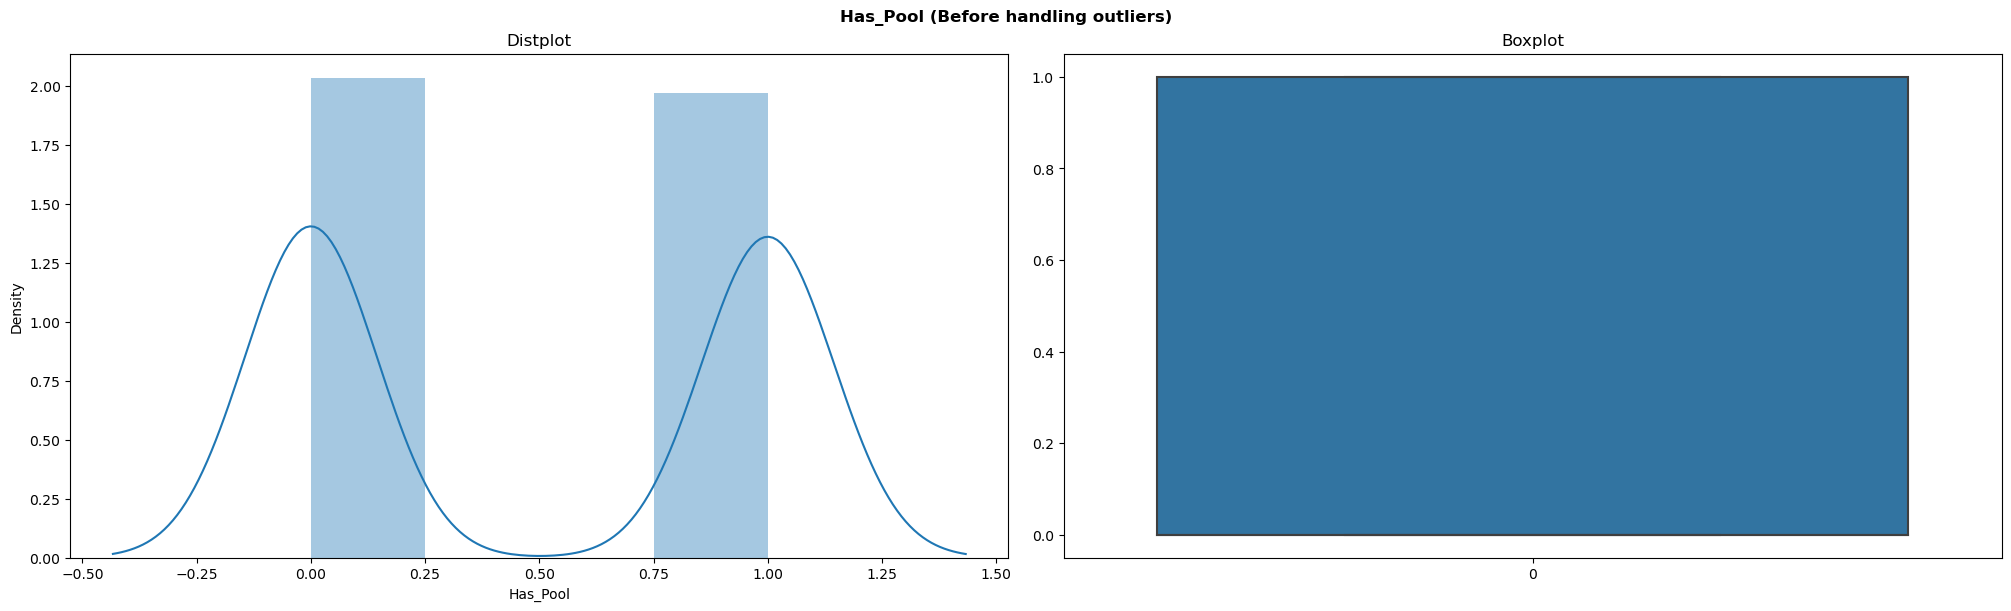

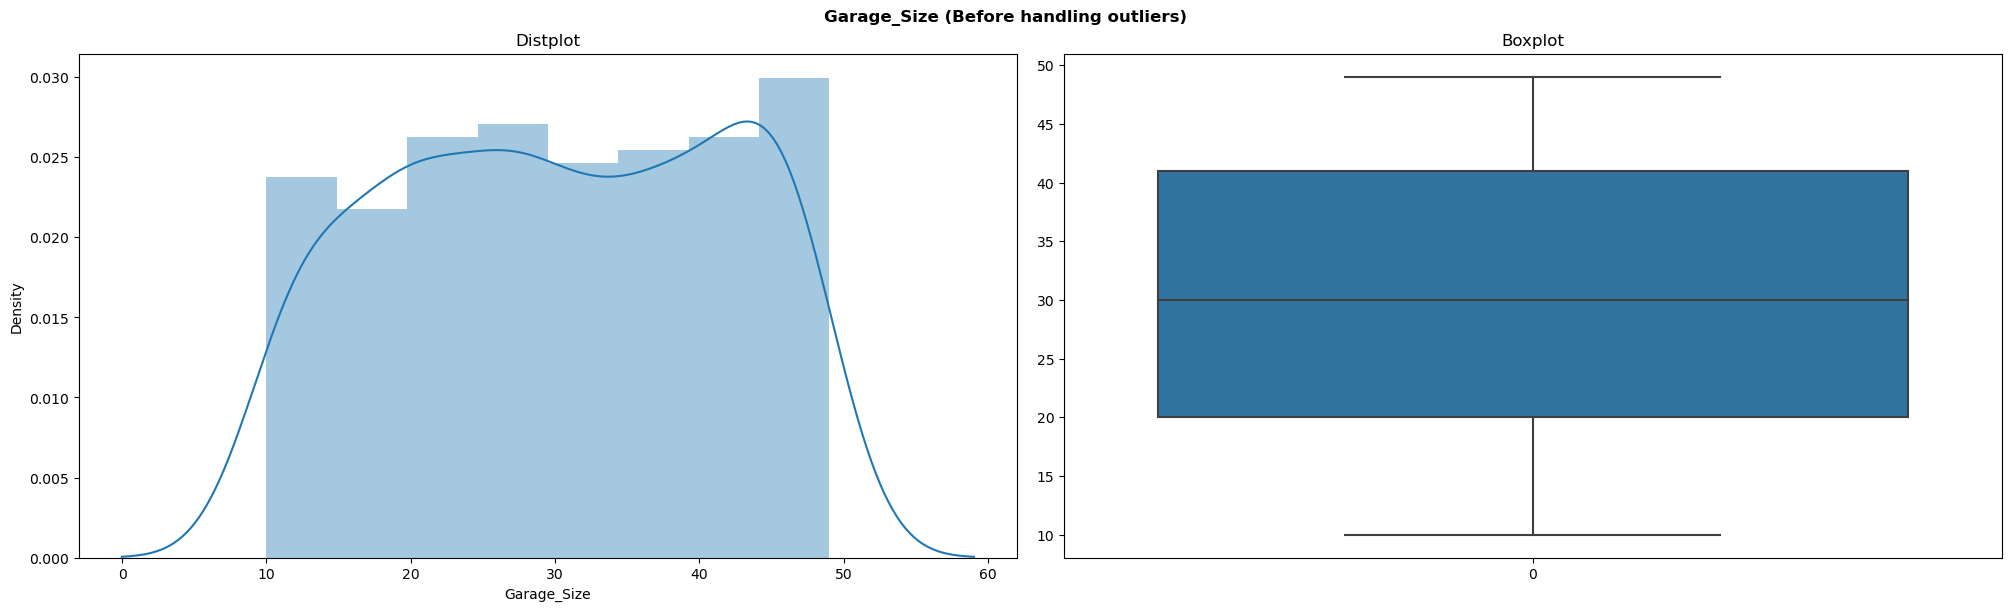

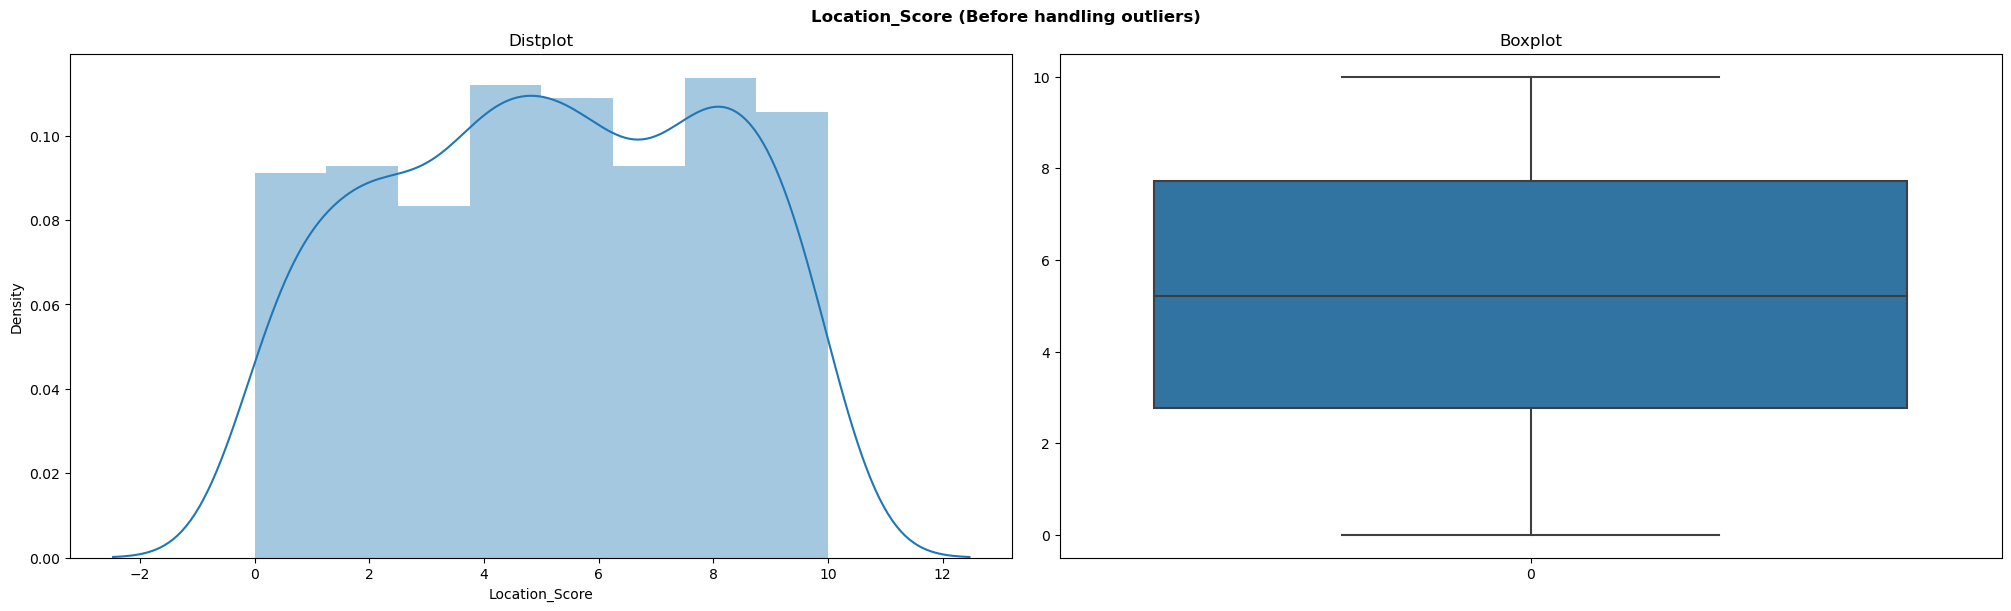

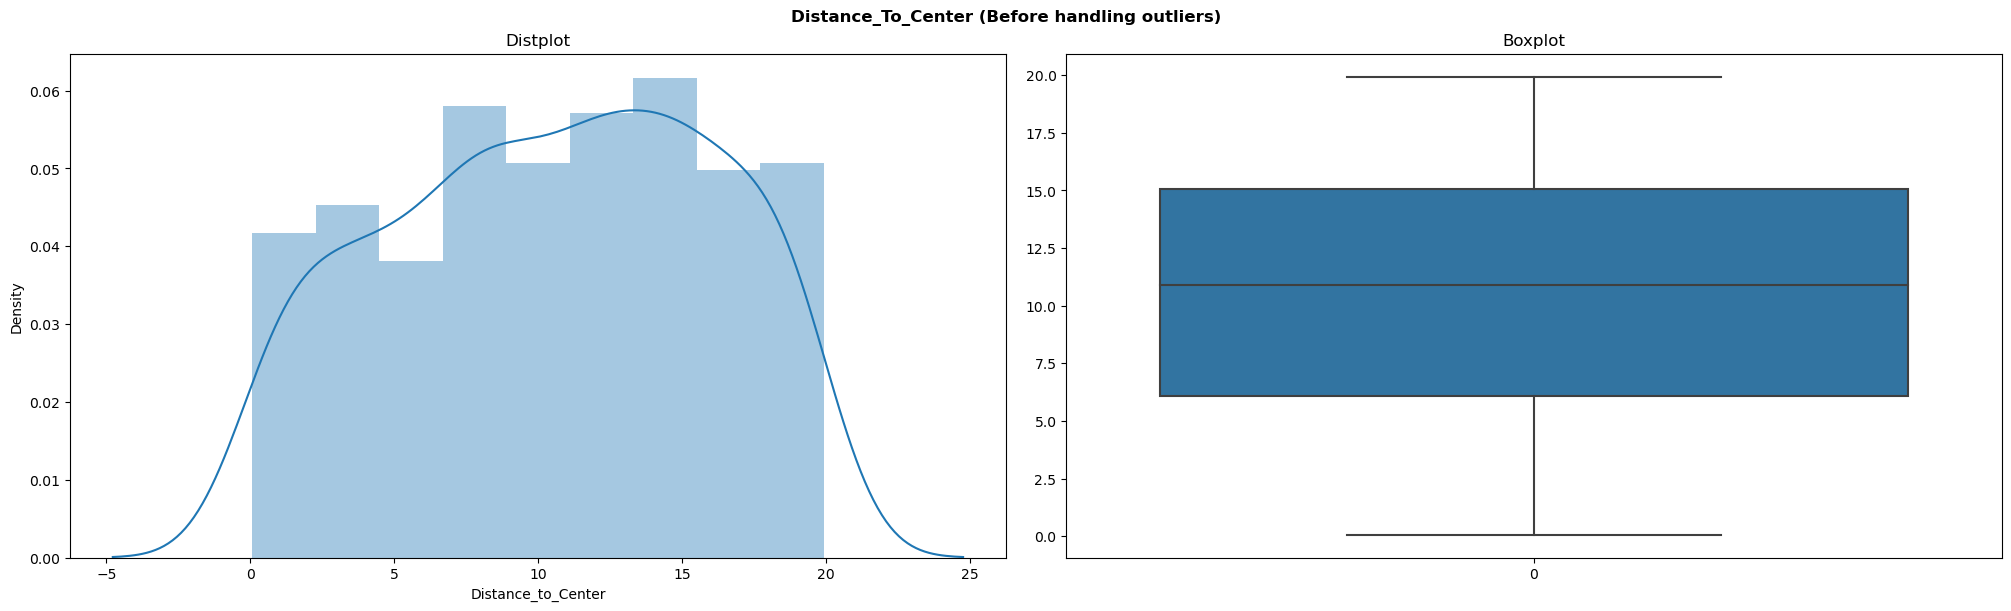

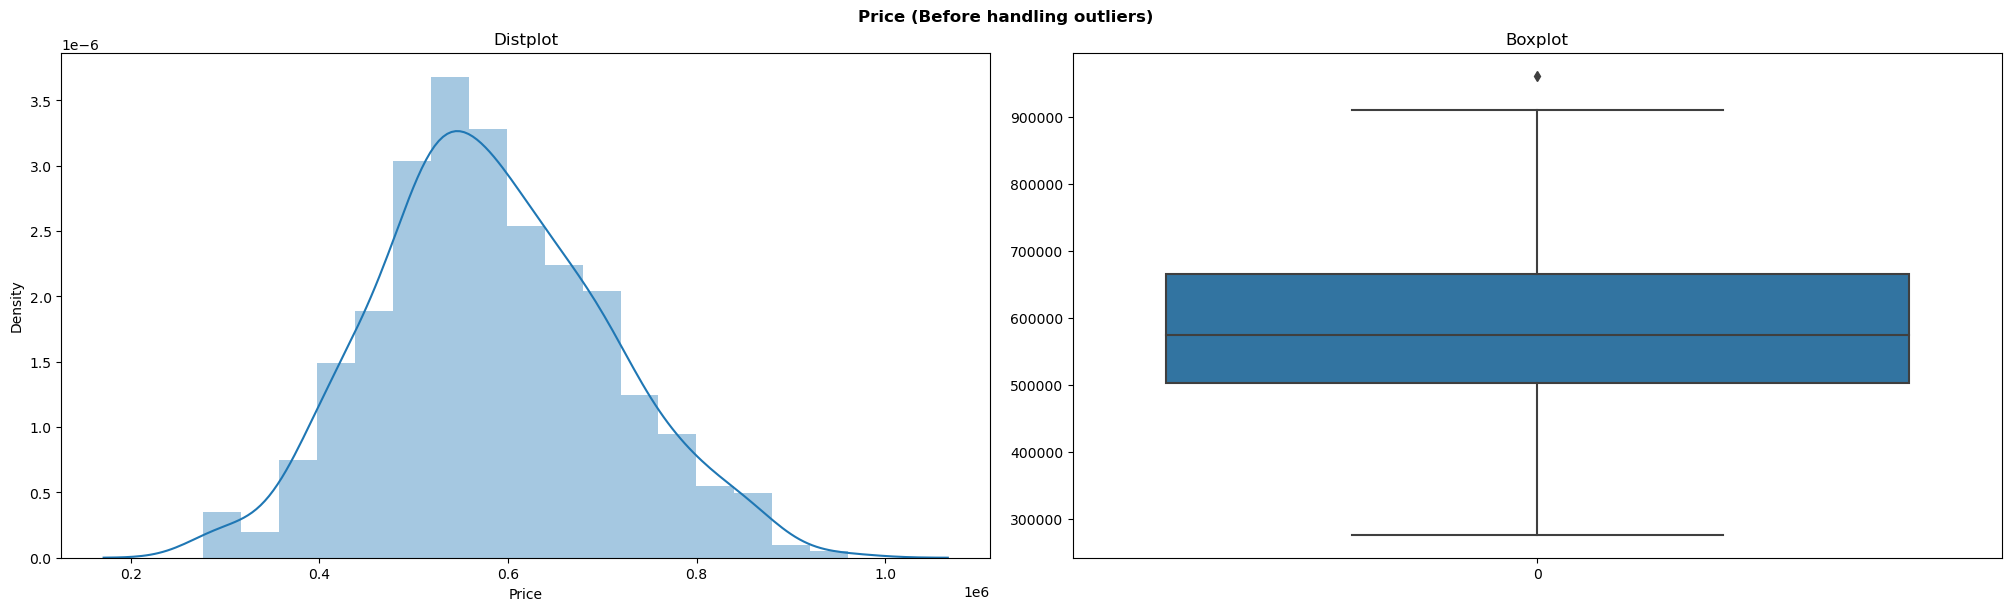

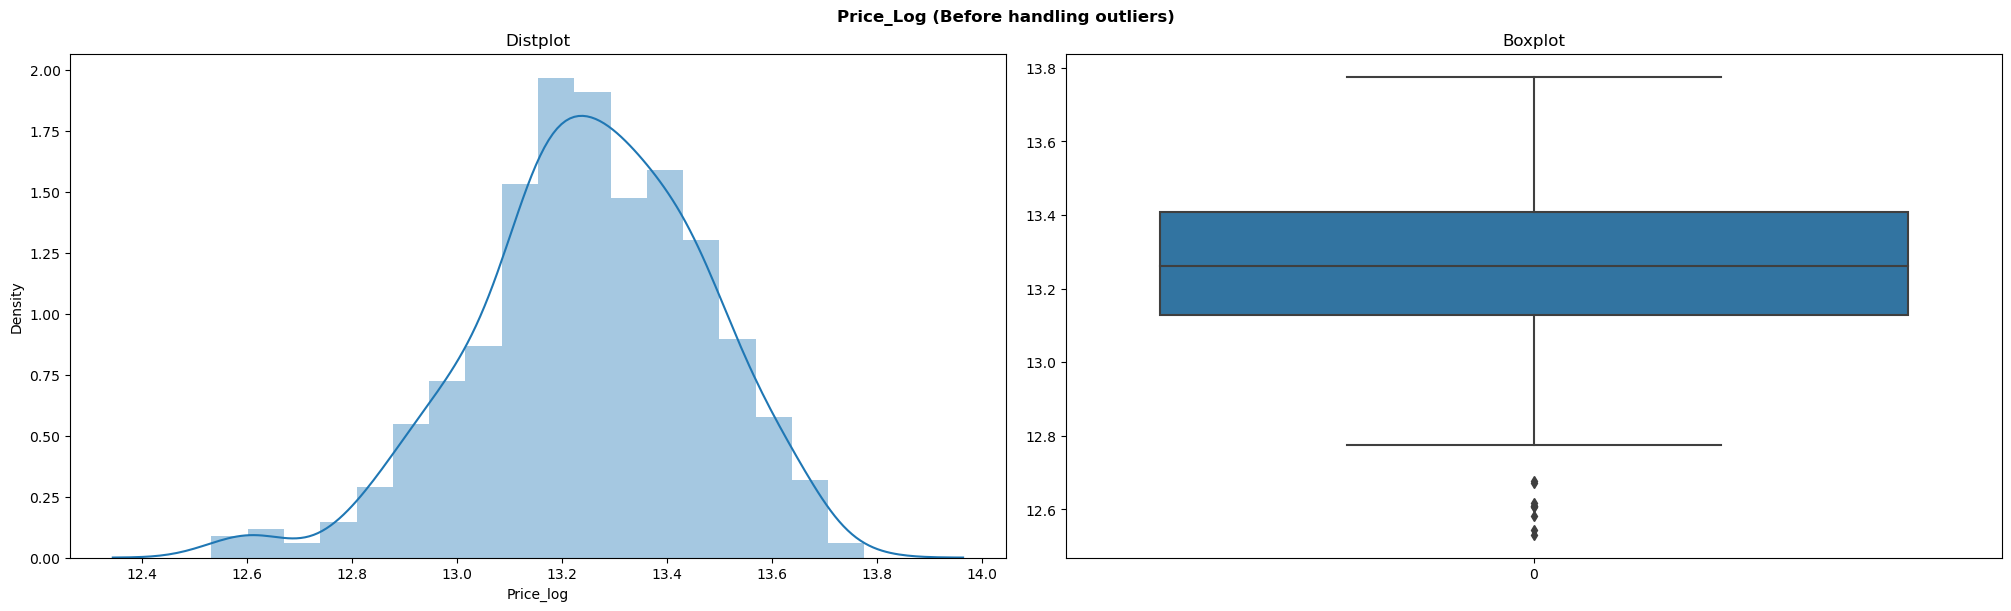

In [21]:
for col in numerical_cols:
    fig, ax =plt.subplots(1,2, constrained_layout=True)
    fig.set_size_inches(20, 6)
    sns.distplot(dataset[col], ax=ax[0]).set(title="Distplot")
    sns.boxplot(dataset[col], ax=ax[1]).set(title="Boxplot")
    plt.suptitle(f'{col.title()} (Before handling outliers)',weight='bold')
    fig.show()

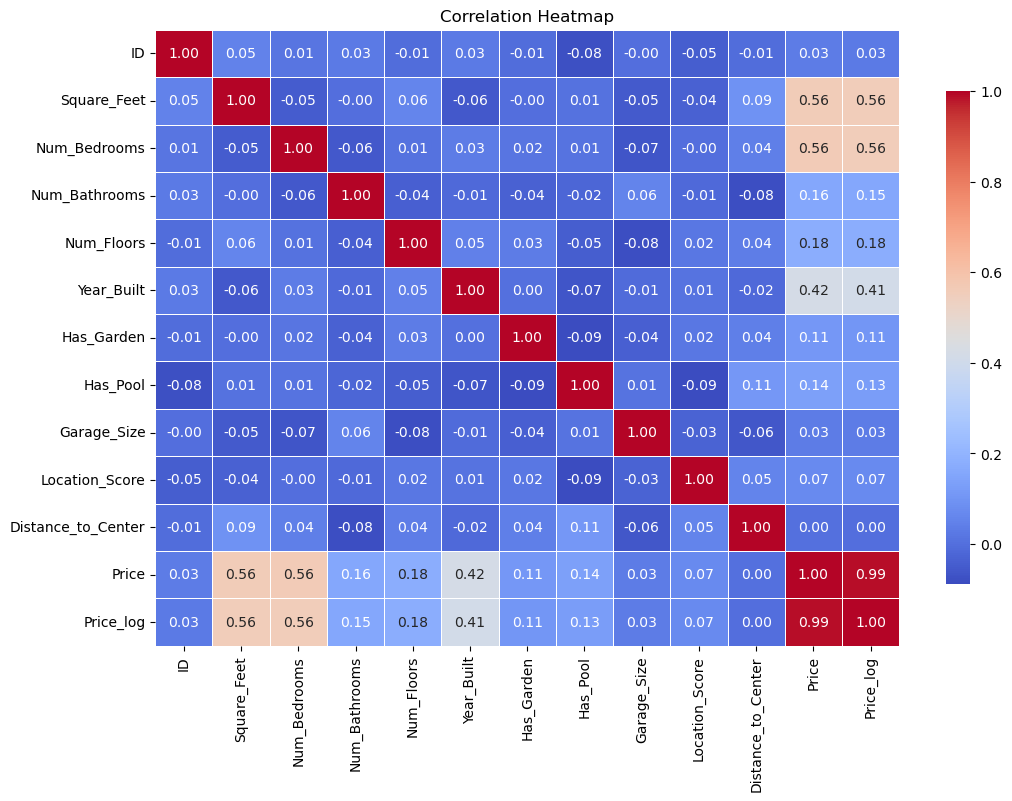

In [22]:
cor= dataset.select_dtypes(exclude=object).corr()
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
sns.heatmap(cor, annot=True, linewidths=0.6, cmap='coolwarm', cbar_kws={'shrink': 0.8}, fmt=".2f")

# Show the plot
plt.title('Correlation Heatmap')
plt.show()

## split data_set

## preprocessing and modeliing 

In [26]:
X = dataset.drop(columns=['Price', 'ID'])  
y = dataset['Price_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Model Performance:
Mean Absolute Error (MAE): 0.00
Mean Squared Error (MSE): 0.00
Root Mean Squared Error (RMSE): 0.02
R² Score: 0.99
